#### **<span style='color:skyblue'>Bachelor Thesis <br/> Explaining Weather Data Using SHAP</span>**

Student Name: **Sára Jurovatá**

Student Number: **11919776**

Supervisor: **Dr. Sabrina Kirrane**<br/>

*Institute for Information Systems and New Media* <br/>
*Vienna University of Economics and Business*

## Data Loading

In [1]:
# Import libraries & packages
import datetime
import glob
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read meteo data
meteo_path = '/Users/sara/Documents/WU/BBE/3rd_Year/Semester6/Thesis/Code&Data/meteo'
all_files_meteo = glob.glob(meteo_path + "/*.csv")

li = []

for filename_meteo in all_files_meteo:
    df = pd.read_csv(filename_meteo, index_col=None, header=0)
    li.append(df)

df_meteo = pd.concat(li, axis=0, ignore_index=True)
df_meteo

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,22.09,bereinigt
1,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,T,d1,°C,2.68,bereinigt
2,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,p,d1,hPa,950.77,bereinigt
3,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,T_max_h1,d1,°C,4.51,bereinigt
4,1995-01-02T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,26.13,bereinigt
...,...,...,...,...,...,...,...
86137,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,RainDur,d1,min,0.00,bereinigt
86138,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,T,d1,°C,1.01,bereinigt
86139,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,p,d1,hPa,968.63,bereinigt
86140,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,T_max_h1,d1,°C,4.23,bereinigt


In [3]:
print(df_meteo.apply(lambda col: col.unique()))
df_meteo['Standort'].unique()

Datum        [1995-01-01T00:00+0100, 1995-01-02T00:00+0100,...
Standort     [Zch_Stampfenbachstrasse, Zch_Schimmelstrasse,...
Parameter                    [StrGlo, T, p, T_max_h1, RainDur]
Intervall                                                 [d1]
Einheit                                   [W/m2, °C, hPa, min]
Wert         [22.09, 2.68, 950.77, 4.51, 26.13, -1.17, 960....
Status                               [bereinigt, provisorisch]
dtype: object


array(['Zch_Stampfenbachstrasse', 'Zch_Schimmelstrasse',
       'Zch_Rosengartenstrasse'], dtype=object)

In [4]:
# Read air quality data
air_path = '/Users/sara/Documents/WU/BBE/3rd_Year/Semester6/Thesis/Code&Data/air-quality/'
all_files_air = glob.glob(air_path + "/*.csv")

li = []

for filename_air in all_files_air:
    df = pd.read_csv(filename_air, index_col=None, header=0)
    li.append(df)

df_air = pd.concat(li, axis=0, ignore_index=True)
df_air

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2010-01-01T00:00+0100,Zch_Heubeeribüel,NO2,d1,µg/m3,24.01,bereinigt
1,2010-01-01T00:00+0100,Zch_Heubeeribüel,NO,d1,µg/m3,4.47,bereinigt
2,2010-01-01T00:00+0100,Zch_Heubeeribüel,NOx,d1,ppb,16.14,bereinigt
3,2010-01-01T00:00+0100,Zch_Heubeeribüel,O3,d1,µg/m3,15.23,bereinigt
4,2010-01-01T00:00+0100,Zch_Heubeeribüel,O3_max_h1,d1,µg/m3,30.96,bereinigt
...,...,...,...,...,...,...,...
242148,2015-12-31T00:00+0100,Zch_Stampfenbachstrasse,O3_max_h1,d1,µg/m3,5.33,bereinigt
242149,2015-12-31T00:00+0100,Zch_Stampfenbachstrasse,O3_nb_h1>120,d1,1,0.00,bereinigt
242150,2015-12-31T00:00+0100,Zch_Stampfenbachstrasse,PM10,d1,µg/m3,41.94,bereinigt
242151,2015-12-31T00:00+0100,Zch_Stampfenbachstrasse,CO,d1,mg/m3,0.50,bereinigt


In [5]:
df_air['Standort'].unique()

# Create one merged dataset (meteo + air quality data)
merged_data = pd.merge(df_meteo, df_air, on = ['Datum', 'Standort', 'Intervall', 'Status'])
merged_data # 741078 rows, 10 columns

,Datum,Standort,Parameter_x,Intervall,Einheit_x,Wert_x,Status,Parameter_y,Einheit_y,Wert_y
0,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,22.09,bereinigt,O3,µg/m3,48.85
1,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,22.09,bereinigt,O3_max_h1,µg/m3,60.06
2,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,22.09,bereinigt,O3_nb_h1>120,1,0.00
3,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,22.09,bereinigt,CO,mg/m3,0.47
4,1995-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,22.09,bereinigt,NO2,µg/m3,19.38
...,...,...,...,...,...,...,...,...,...,...
741073,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,69.43,bereinigt,O3_max_h1,µg/m3,15.63
741074,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,69.43,bereinigt,O3_nb_h1>120,1,0.00
741075,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,69.43,bereinigt,PM10,µg/m3,31.59
741076,2013-12-31T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,d1,W/m2,69.43,bereinigt,CO,mg/m3,0.53


In [6]:
# Check for NAs
merged_data.isna().sum() # even though there are NAs, we will not drop them now since we will still change the dataset considerably
                         # and we do not want to loose any values

Datum              0
Standort           0
Parameter_x        0
Intervall          0
Einheit_x          0
Wert_x          8486
Status             0
Parameter_y        0
Einheit_y          0
Wert_y         10476
dtype: int64

In [7]:
# Check for duplicates
merged_data.loc[merged_data.duplicated(), :]

,Datum,Standort,Parameter_x,Intervall,Einheit_x,Wert_x,Status,Parameter_y,Einheit_y,Wert_y


## Data Processing

In [8]:
# Rename columns
merged_data.columns = ['Date', 'Location', 'Parameter_Meteo', 'Interval', 'Unit_Meteo', 'Value_Meteo', 'Status', 'Parameter_Air_Quality', 'Unit_Air_Quality', 'Value_Air_Quality']

# Rename value names in 'Parameter_Meteo' and 'Status' columns
merged_data['Parameter_Meteo'] = merged_data['Parameter_Meteo'].replace(['p', 'RainDur', 'StrGlo', 'T', 'Hr'],['air_pressure', 'precipitation_duration', 'global_radiation', 'temperature', 'relative_humidity'])
merged_data['Status'] = merged_data['Status'].replace(['bereinigt', 'provisorisch'],['revised', 'provisional'])

In [9]:
# Check vaiable data types
merged_data.dtypes

Date                      object
Location                  object
Parameter_Meteo           object
Interval                  object
Unit_Meteo                object
Value_Meteo              float64
Status                    object
Parameter_Air_Quality     object
Unit_Air_Quality          object
Value_Air_Quality        float64
dtype: object

In [10]:
# Change the date format (keep date only, time is redundant)
merged_data['Date'] =  pd.to_datetime(merged_data['Date'])
merged_data

,Date,Location,Parameter_Meteo,Interval,Unit_Meteo,Value_Meteo,Status,Parameter_Air_Quality,Unit_Air_Quality,Value_Air_Quality
0,1995-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,22.09,revised,O3,µg/m3,48.85
1,1995-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,22.09,revised,O3_max_h1,µg/m3,60.06
2,1995-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,22.09,revised,O3_nb_h1>120,1,0.00
3,1995-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,22.09,revised,CO,mg/m3,0.47
4,1995-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,22.09,revised,NO2,µg/m3,19.38
...,...,...,...,...,...,...,...,...,...,...
741073,2013-12-31 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,69.43,revised,O3_max_h1,µg/m3,15.63
741074,2013-12-31 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,69.43,revised,O3_nb_h1>120,1,0.00
741075,2013-12-31 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,69.43,revised,PM10,µg/m3,31.59
741076,2013-12-31 00:00:00+01:00,Zch_Stampfenbachstrasse,global_radiation,d1,W/m2,69.43,revised,CO,mg/m3,0.53


In [11]:
# Look at the number of unique values per variable
merged_data.nunique()

Date                     10847
Location                     3
Parameter_Meteo              5
Interval                     1
Unit_Meteo                   4
Value_Meteo              20266
Status                       2
Parameter_Air_Quality       11
Unit_Air_Quality             5
Value_Air_Quality        19072
dtype: int64

In [12]:
# Look at the unique values of string variables
print(merged_data['Location'].unique())
print(merged_data['Parameter_Meteo'].unique())
print(merged_data['Interval'].unique())
print(merged_data['Unit_Meteo'].unique())
print(merged_data['Status'].unique())
print(merged_data['Parameter_Air_Quality'].unique())
print(merged_data['Unit_Air_Quality'].unique())

['Zch_Stampfenbachstrasse' 'Zch_Schimmelstrasse' 'Zch_Rosengartenstrasse']
['global_radiation' 'temperature' 'air_pressure' 'T_max_h1'
 'precipitation_duration']
['d1']
['W/m2' '°C' 'hPa' 'min']
['revised' 'provisional']
['O3' 'O3_max_h1' 'O3_nb_h1>120' 'CO' 'NO2' 'NO' 'NOx' 'SO2' 'PM10'
 'PM2.5' 'PN']
['µg/m3' '1' 'mg/m3' 'ppb' '1/cm3']


In [13]:
# Check if there is only one unit value for each Parameter_Meteo
df1 = merged_data[merged_data['Parameter_Meteo'] == 'global_radiation']
print(df1['Unit_Meteo'].unique())

df2 = merged_data[merged_data['Parameter_Meteo'] == 'temperature']
print(df2['Unit_Meteo'].unique())

df3 = merged_data[merged_data['Parameter_Meteo'] == 'air_pressure']
print(df3['Unit_Meteo'].unique())

df4 = merged_data[merged_data['Parameter_Meteo'] == 'T_max_h1']
print(df4['Unit_Meteo'].unique())

df5 = merged_data[merged_data['Parameter_Meteo'] == 'precipitation_duration']
print(df5['Unit_Meteo'].unique())

['W/m2']
['°C']
['hPa']
['°C']
['min']


In [14]:
# Check if there is only one unit value for each Parameter_Air_Quality
df6 = merged_data[merged_data['Parameter_Air_Quality'] == 'O3']
print(df6['Unit_Air_Quality'].unique())

df7 = merged_data[merged_data['Parameter_Air_Quality'] == 'O3_max_h1']
print(df7['Unit_Air_Quality'].unique())

df8 = merged_data[merged_data['Parameter_Air_Quality'] == 'O3_nb_h1>120']
print(df8['Unit_Air_Quality'].unique())

df9 = merged_data[merged_data['Parameter_Air_Quality'] == 'CO']
print(df9['Unit_Air_Quality'].unique())

df10 = merged_data[merged_data['Parameter_Air_Quality'] == 'NO2']
print(df10['Unit_Air_Quality'].unique())

df11 = merged_data[merged_data['Parameter_Air_Quality'] == 'NO']
print(df11['Unit_Air_Quality'].unique())

df12 = merged_data[merged_data['Parameter_Air_Quality'] == 'NOx']
print(df12['Unit_Air_Quality'].unique())

df13 = merged_data[merged_data['Parameter_Air_Quality'] == 'SO2']
print(df13['Unit_Air_Quality'].unique())

df14 = merged_data[merged_data['Parameter_Air_Quality'] == 'PM10']
print(df14['Unit_Air_Quality'].unique())

df15 = merged_data[merged_data['Parameter_Air_Quality'] == 'PM2.5']
print(df15['Unit_Air_Quality'].unique())

df16 = merged_data[merged_data['Parameter_Air_Quality'] == 'PN']
print(df16['Unit_Air_Quality'].unique())

['µg/m3']
['µg/m3']
['1']
['mg/m3']
['µg/m3']
['µg/m3']
['ppb']
['µg/m3']
['µg/m3']
['µg/m3']
['1/cm3']


In [15]:
# Drop the 'Interval' column since it has only 1 unique value (would not help predictions)
# Drop the Unit_Meteo and Unit_Air_Quality (unique for Value columns)
merged_data = merged_data.drop(columns=['Interval','Unit_Meteo', 'Unit_Air_Quality'])

In [94]:
# Look at the mean, min, and max values of integer and datetime variables
print(merged_data['Date'].mean())
print(merged_data['Date'].min())
print(merged_data['Date'].max())
print(merged_data['Value_Meteo'].mean())
print(merged_data['Value_Meteo'].min())
print(merged_data['Value_Meteo'].max())
print(merged_data['Value_Air_Quality'].mean())
print(merged_data['Value_Air_Quality'].min())
print(merged_data['Value_Air_Quality'].max())

2011-03-13 18:28:29.922032640+01:00
1992-07-01 00:00:00+01:00
2022-03-15 00:00:00+01:00
256.3195557827549
-10.93
1440.0
525.8219533617483
-0.02
78863.57


In [17]:
# Create separate columns for Parameter_Meteo and Parameter_Air_Quality based on Date
# Rename final detaset to df

# pivot n.1 - create columns for Parameter_Air_Quality
df = merged_data.pivot(index=['Date','Location','Parameter_Meteo','Value_Meteo','Status'],
                       columns='Parameter_Air_Quality',
                       values='Value_Air_Quality')
print(df.columns.tolist())
df.reset_index(inplace=True)
print(df.columns.tolist())

# pivot n.2 - create columns for Parameter_Meteo
df = df.pivot(index=['Date','Location','Status','CO','NO','NO2','NOx','O3','O3_max_h1','O3_nb_h1>120','PM10','PM2.5','PN','SO2'],
              columns='Parameter_Meteo',
              values='Value_Meteo')
df.reset_index(inplace=True)
print(df.columns.tolist())
df.columns.name = None # remove index header

# print final dataframe
df

['CO', 'NO', 'NO2', 'NOx', 'O3', 'O3_max_h1', 'O3_nb_h1>120', 'PM10', 'PM2.5', 'PN', 'SO2']
['Date', 'Location', 'Parameter_Meteo', 'Value_Meteo', 'Status', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'O3_max_h1', 'O3_nb_h1>120', 'PM10', 'PM2.5', 'PN', 'SO2']
['Date', 'Location', 'Status', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'O3_max_h1', 'O3_nb_h1>120', 'PM10', 'PM2.5', 'PN', 'SO2', 'T_max_h1', 'air_pressure', 'global_radiation', 'precipitation_duration', 'temperature']


,Date,Location,Status,CO,NO,NO2,NOx,O3,O3_max_h1,O3_nb_h1>120,PM10,PM2.5,PN,SO2,T_max_h1,air_pressure,global_radiation,precipitation_duration,temperature
0,1992-07-01 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,0.92,27.20,51.93,48.96,60.55,95.79,0.0,NaN,NaN,NaN,6.35,21.72,963.06,135.06,NaN,18.99
1,1992-07-02 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,1.33,51.72,66.81,76.40,48.29,94.66,0.0,NaN,NaN,NaN,7.70,21.98,965.23,149.37,NaN,18.36
2,1992-07-03 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,1.49,55.47,62.20,77.00,NaN,NaN,NaN,NaN,NaN,NaN,9.18,26.30,965.09,247.37,NaN,21.47
3,1992-07-04 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,0.66,16.31,33.39,30.54,57.59,92.40,0.0,NaN,NaN,NaN,4.07,20.55,960.75,73.66,NaN,17.53
4,1992-07-05 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,0.54,19.79,22.53,27.65,39.64,59.95,0.0,NaN,NaN,NaN,3.43,18.11,957.95,111.20,NaN,15.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20196,2022-03-14 00:00:00+01:00,Zch_Schimmelstrasse,provisional,NaN,15.43,34.00,30.15,64.04,86.22,0.0,11.66,6.07,13144.87,NaN,14.39,977.64,NaN,97.28,10.80
20197,2022-03-14 00:00:00+01:00,Zch_Stampfenbachstrasse,provisional,0.23,4.27,19.14,13.43,72.28,86.38,0.0,9.30,5.85,16082.62,1.09,14.48,975.04,196.38,129.13,10.60
20198,2022-03-15 00:00:00+01:00,Zch_Rosengartenstrasse,provisional,NaN,34.47,55.63,56.73,16.55,51.14,0.0,19.26,11.98,NaN,NaN,9.73,974.51,NaN,257.47,8.38
20199,2022-03-15 00:00:00+01:00,Zch_Schimmelstrasse,provisional,NaN,21.24,53.72,45.12,17.86,51.25,0.0,19.43,9.86,16533.92,NaN,9.78,976.87,NaN,300.25,8.64


In [18]:
df.describe()

,CO,NO,NO2,NOx,O3,O3_max_h1,O3_nb_h1>120,PM10,PM2.5,PN,SO2,T_max_h1,air_pressure,global_radiation,precipitation_duration,temperature
count,10782.000000,20041.000000,20041.000000,20041.000000,20012.000000,19997.000000,19997.000000,16236.000000,5202.000000,5783.000000,10727.000000,19841.000000,18254.000000,10163.000000,16939.000000,19852.000000
mean,0.547768,29.840674,39.636974,44.650742,40.097096,68.553856,0.365455,20.820608,11.025996,14508.928087,5.335884,14.974300,966.931332,125.491918,131.204401,11.525450
std,0.372418,29.208695,15.644224,29.720024,24.365323,34.733014,1.518461,12.676461,6.185434,5678.041384,6.502235,8.713075,7.608268,90.646873,216.196273,7.563799
min,0.070000,0.440000,4.500000,2.820000,0.510000,0.990000,0.000000,0.930000,1.960000,0.000000,-0.020000,-9.740000,931.500000,2.320000,0.000000,-10.930000
25%,0.300000,10.400000,28.320000,23.800000,19.197500,44.840000,0.000000,12.230000,6.692500,10853.710000,1.410000,7.930000,962.550000,47.290000,0.000000,5.440000
50%,0.430000,21.000000,38.710000,37.960000,40.400000,68.280000,0.000000,17.820000,9.505000,13687.550000,3.050000,14.990000,967.295000,102.960000,11.130000,11.490000
75%,0.670000,39.140000,49.530000,57.920000,57.820000,90.560000,0.000000,25.740000,13.590000,17388.680000,6.530000,21.820000,971.670000,195.495000,191.700000,17.542500
max,3.980000,337.760000,112.040000,307.610000,126.210000,266.390000,16.000000,163.450000,60.660000,78863.570000,99.510000,36.550000,992.940000,363.270000,1440.000000,30.040000


In [19]:
# Look for NAs again
df.isna().values.any()
df.isna().any()

# replace the NAs with the mean values for respective columns
df = df.fillna(df.mean())
df

/var/folders/f2/9l4sh5b16453__qgj2x0pb_m0000gn/T/ipykernel_3078/1674957149.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
/var/folders/f2/9l4sh5b16453__qgj2x0pb_m0000gn/T/ipykernel_3078/1674957149.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


,Date,Location,Status,CO,NO,NO2,NOx,O3,O3_max_h1,O3_nb_h1>120,PM10,PM2.5,PN,SO2,T_max_h1,air_pressure,global_radiation,precipitation_duration,temperature
0,1992-07-01 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,0.920000,27.20,51.93,48.96,60.550000,95.790000,0.000000,20.820608,11.025996,14508.928087,6.350000,21.72,963.06,135.060000,131.204401,18.99
1,1992-07-02 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,1.330000,51.72,66.81,76.40,48.290000,94.660000,0.000000,20.820608,11.025996,14508.928087,7.700000,21.98,965.23,149.370000,131.204401,18.36
2,1992-07-03 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,1.490000,55.47,62.20,77.00,40.097096,68.553856,0.365455,20.820608,11.025996,14508.928087,9.180000,26.30,965.09,247.370000,131.204401,21.47
3,1992-07-04 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,0.660000,16.31,33.39,30.54,57.590000,92.400000,0.000000,20.820608,11.025996,14508.928087,4.070000,20.55,960.75,73.660000,131.204401,17.53
4,1992-07-05 00:00:00+01:00,Zch_Stampfenbachstrasse,revised,0.540000,19.79,22.53,27.65,39.640000,59.950000,0.000000,20.820608,11.025996,14508.928087,3.430000,18.11,957.95,111.200000,131.204401,15.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20196,2022-03-14 00:00:00+01:00,Zch_Schimmelstrasse,provisional,0.547768,15.43,34.00,30.15,64.040000,86.220000,0.000000,11.660000,6.070000,13144.870000,5.335884,14.39,977.64,125.491918,97.280000,10.80
20197,2022-03-14 00:00:00+01:00,Zch_Stampfenbachstrasse,provisional,0.230000,4.27,19.14,13.43,72.280000,86.380000,0.000000,9.300000,5.850000,16082.620000,1.090000,14.48,975.04,196.380000,129.130000,10.60
20198,2022-03-15 00:00:00+01:00,Zch_Rosengartenstrasse,provisional,0.547768,34.47,55.63,56.73,16.550000,51.140000,0.000000,19.260000,11.980000,14508.928087,5.335884,9.73,974.51,125.491918,257.470000,8.38
20199,2022-03-15 00:00:00+01:00,Zch_Schimmelstrasse,provisional,0.547768,21.24,53.72,45.12,17.860000,51.250000,0.000000,19.430000,9.860000,16533.920000,5.335884,9.78,976.87,125.491918,300.250000,8.64


### Data Visualizations

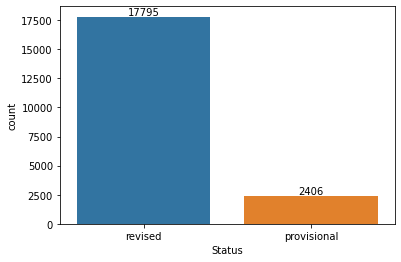

In [20]:
# Graph 1 - Proportion of Provisional vs. Revised Data
g = sns.countplot(x='Status',data=df)
g.bar_label(g.containers[0])
plt.show()

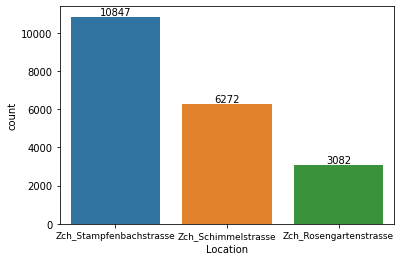

In [21]:
# Graph 2 - Distribution of Location
g = sns.countplot(x='Location',data=df)
g.bar_label(g.containers[0])
g.set_xticklabels(g.get_xticklabels(),fontsize=9)
plt.show()

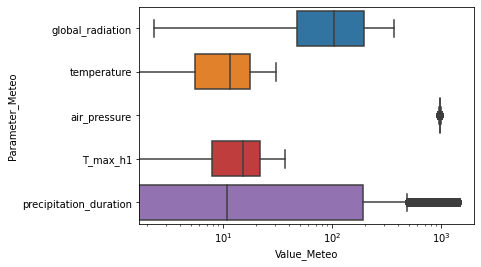

In [22]:
# Graph 3 - Boxplots for Parameter_Meteo Values
g = sns.boxplot(x='Value_Meteo',y='Parameter_Meteo',data=merged_data)
g.set_xscale('log')
plt.show()

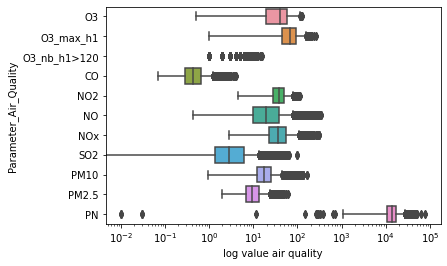

In [23]:
# Graph 4 - Boxplots for Parameter_Air_Quality Values
g = sns.boxplot(x='Value_Air_Quality',y='Parameter_Air_Quality',data=merged_data)
g.set_xscale('log')
plt.xlabel('log value air quality')
plt.show()

In [24]:
sns.set(rc={'figure.figsize':(22,22)}) # set figure size for the plot below

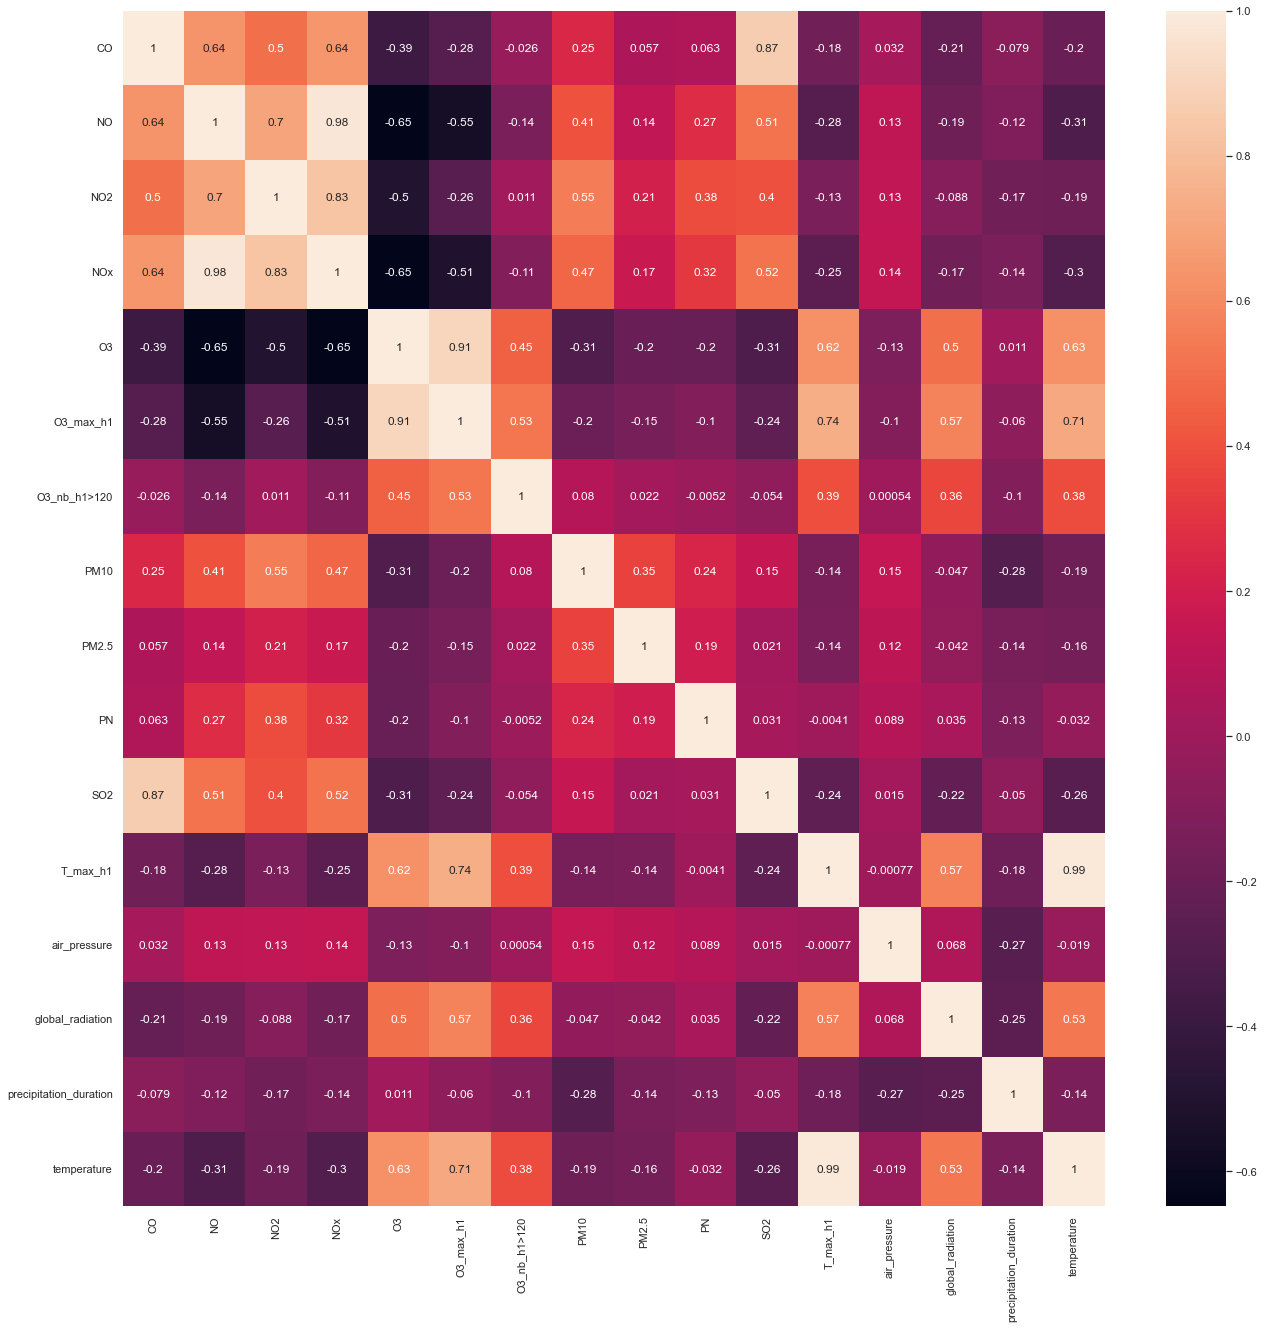

In [25]:
# Graph 5 - Correlation Matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
plt.rcParams["figure.figsize"] = [12.8, 4.8] # set figure size for the plots below

/var/folders/f2/9l4sh5b16453__qgj2x0pb_m0000gn/T/ipykernel_3078/3729827775.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


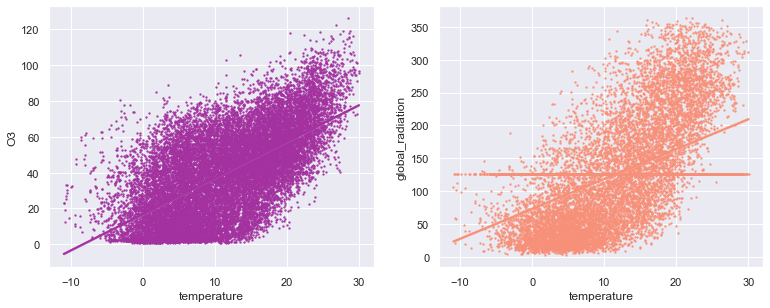

In [27]:
# Graph 6 - Regression Plots of Temperature vs. O3 and Temperature vs. Global Radiation
fig, ax = plt.subplots(1,2)

sns.regplot(x='temperature',y='O3',data=df,scatter_kws={'s':2},ax=ax[0],color='#A3319F')
sns.regplot(x='temperature',y='global_radiation',data=df,scatter_kws={'s':2},ax=ax[1],color='#F89078')
fig.show()

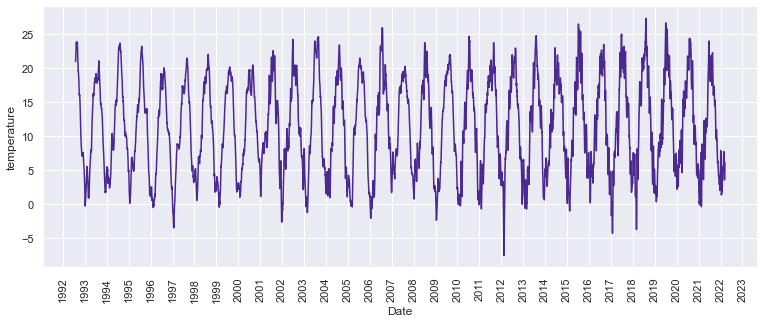

In [28]:
# Graph 7 - Temperature Levels over Years 1992 - 2022
temperature_mean = df.temperature.rolling(window=30).mean()
g = sns.lineplot(x=df.Date,y=temperature_mean,color='#4B2991')
plt.xticks(rotation=90)

g.xaxis.set_major_locator(matplotlib.dates.YearLocator())
g.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

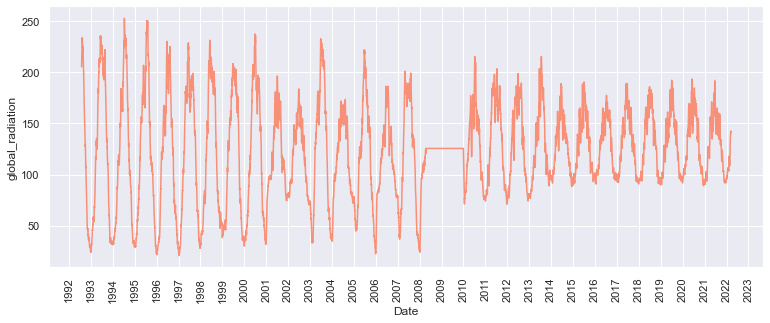

In [29]:
# Graph 8 - Global Radiation Levels over Years 1992 - 2022
global_radiation_mean = df.global_radiation.rolling(window=30).mean()
g = sns.lineplot(x=df.Date,y=global_radiation_mean,color='#F89078')
plt.xticks(rotation=90)

g.xaxis.set_major_locator(matplotlib.dates.YearLocator())
g.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

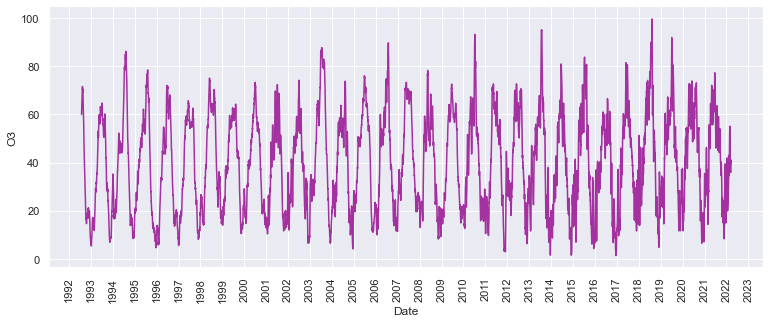

In [30]:
# Graph 9 - O3 Levels over Years 1992 - 2022
O3_mean = df.O3.rolling(window=30).mean()
g = sns.lineplot(x=df.Date,y=O3_mean,color='#A3319F')
plt.xticks(rotation=90)

g.xaxis.set_major_locator(matplotlib.dates.YearLocator())
g.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

## Machine Learning

In [31]:
# Import libraries & packages
from sklearn.model_selection import train_test_split

In [92]:
# Create a new dataframe df_ml (copy of df)
df_ml = df.copy()

# change variable type of Date to integer so that it can be used in linear regression
df_ml['Date'] = df_ml['Date'].astype(int)/1000000000 # in seconds from 1970-01-01 (Unix epoch time)

# create dummy variables out of Status and Location variables
categorical_columns = ['Status','Location']
df_ml = pd.get_dummies(data=df_ml,prefix='ML',prefix_sep='_',columns=categorical_columns,drop_first=True,dtype='int8')

df_ml = df_ml.drop(columns='T_max_h1')
df_ml

,Date,CO,NO,NO2,NOx,O3,O3_max_h1,O3_nb_h1>120,PM10,PM2.5,PN,SO2,air_pressure,global_radiation,precipitation_duration,temperature,ML_revised,ML_Zch_Schimmelstrasse,ML_Zch_Stampfenbachstrasse
0,7.099452e+08,0.920000,27.20,51.93,48.96,60.550000,95.790000,0.000000,20.820608,11.025996,14508.928087,6.350000,963.06,135.060000,131.204401,18.99,1,0,1
1,7.100316e+08,1.330000,51.72,66.81,76.40,48.290000,94.660000,0.000000,20.820608,11.025996,14508.928087,7.700000,965.23,149.370000,131.204401,18.36,1,0,1
2,7.101180e+08,1.490000,55.47,62.20,77.00,40.097096,68.553856,0.365455,20.820608,11.025996,14508.928087,9.180000,965.09,247.370000,131.204401,21.47,1,0,1
3,7.102044e+08,0.660000,16.31,33.39,30.54,57.590000,92.400000,0.000000,20.820608,11.025996,14508.928087,4.070000,960.75,73.660000,131.204401,17.53,1,0,1
4,7.102908e+08,0.540000,19.79,22.53,27.65,39.640000,59.950000,0.000000,20.820608,11.025996,14508.928087,3.430000,957.95,111.200000,131.204401,15.56,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20196,1.647212e+09,0.547768,15.43,34.00,30.15,64.040000,86.220000,0.000000,11.660000,6.070000,13144.870000,5.335884,977.64,125.491918,97.280000,10.80,0,1,0
20197,1.647212e+09,0.230000,4.27,19.14,13.43,72.280000,86.380000,0.000000,9.300000,5.850000,16082.620000,1.090000,975.04,196.380000,129.130000,10.60,0,0,1
20198,1.647299e+09,0.547768,34.47,55.63,56.73,16.550000,51.140000,0.000000,19.260000,11.980000,14508.928087,5.335884,974.51,125.491918,257.470000,8.38,0,0,0
20199,1.647299e+09,0.547768,21.24,53.72,45.12,17.860000,51.250000,0.000000,19.430000,9.860000,16533.920000,5.335884,976.87,125.491918,300.250000,8.64,0,1,0


In [93]:
# Look at the mean values of variables
df_ml.mean().apply(lambda x: '%.3f' % x)

Date                          1283018710.262
CO                                     0.548
NO                                    29.841
NO2                                   39.637
NOx                                   44.651
O3                                    40.097
O3_max_h1                             68.554
O3_nb_h1>120                           0.365
PM10                                  20.821
PM2.5                                 11.026
PN                                 14508.928
SO2                                    5.336
air_pressure                         966.931
global_radiation                     125.492
precipitation_duration               131.204
temperature                           11.525
ML_revised                             0.881
ML_Zch_Schimmelstrasse                 0.310
ML_Zch_Stampfenbachstrasse             0.537
dtype: object

In [88]:
# Look at the min values of variables
df_ml.min().apply(lambda x: '%.3f' % x)

Date                          709945200.000
CO                                    0.070
NO                                    0.440
NO2                                   4.500
NOx                                   2.820
O3                                    0.510
O3_max_h1                             0.990
O3_nb_h1>120                          0.000
PM10                                  0.930
PM2.5                                 1.960
PN                                    0.000
SO2                                  -0.020
air_pressure                        931.500
global_radiation                      2.320
precipitation_duration                0.000
temperature                         -10.930
ML_revised                            0.000
ML_Zch_Schimmelstrasse                0.000
ML_Zch_Stampfenbachstrasse            0.000
dtype: object

In [90]:
# Look at the max values of variables
df_ml.max().apply(lambda x: '%.3f' % x)

Date                          1647298800.000
CO                                     3.980
NO                                   337.760
NO2                                  112.040
NOx                                  307.610
O3                                   126.210
O3_max_h1                            266.390
O3_nb_h1>120                          16.000
PM10                                 163.450
PM2.5                                 60.660
PN                                 78863.570
SO2                                   99.510
air_pressure                         992.940
global_radiation                     363.270
precipitation_duration              1440.000
temperature                           30.040
ML_revised                             1.000
ML_Zch_Schimmelstrasse                 1.000
ML_Zch_Stampfenbachstrasse             1.000
dtype: object

In [34]:
# Check if there are any days for which both revised and provisional observations are available (possible duplicates)
df_1 = df_ml[(df_ml['ML_Zch_Schimmelstrasse'] == 1)]
d1 = df_1.Date.nunique()

df_2 = df_ml[(df_ml['ML_Zch_Stampfenbachstrasse'] == 1)]
d2 = df_2.Date.nunique()

df_3 = df_ml[(df_ml['ML_Zch_Schimmelstrasse'] == 0) & (df_ml['ML_Zch_Stampfenbachstrasse'] == 0)]
d3 = df_3.Date.nunique()

d1 + d2 + d3 == df_ml[df_ml.columns[0]].count()

True

In [35]:
# Create train and test split
X = df_ml.drop('temperature',axis=1) # independet variable
Y = df_ml['temperature'] # dependent variable

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Linear Regression

In [36]:
# Import libraries & packages
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [37]:
# Fit the model
lr = LinearRegression()
lr = lr.fit(X_train, Y_train)

In [38]:
# Make predictions
Y_pred_lr = lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


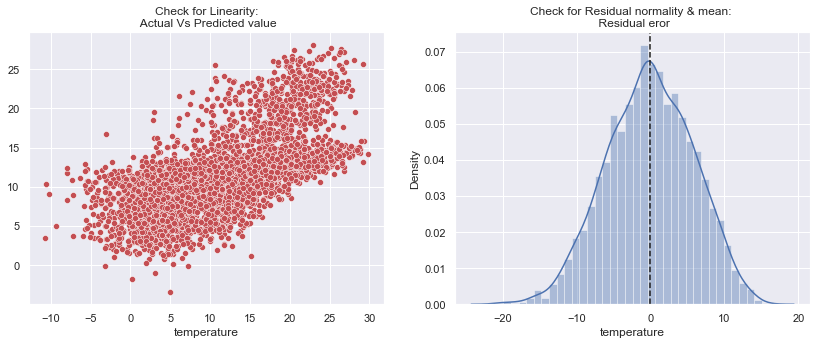

In [39]:
# Source: https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(Y_test,Y_pred_lr,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((Y_test - Y_pred_lr),ax=ax,color='b')
ax.axvline((Y_test - Y_pred_lr).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

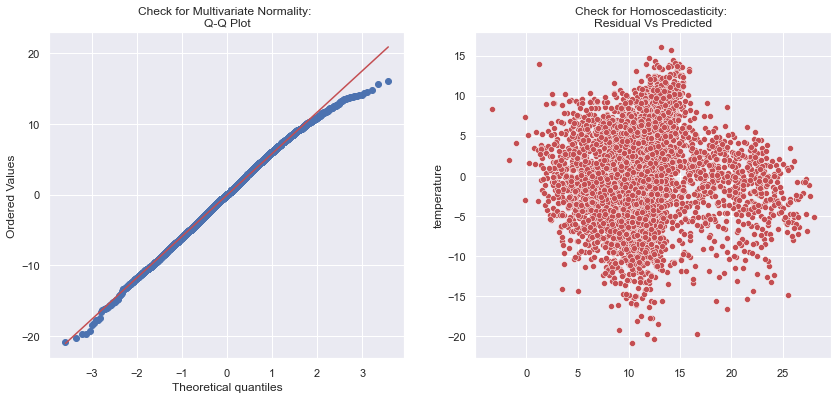

In [40]:
# Source: https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((Y_test - Y_pred_lr),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (Y_test - Y_pred_lr), x= Y_pred_lr, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

#### SHAP

In [41]:
# Install and import libraries & packages
#  pip3 install shap
import shap
# pip install interpret

In [42]:
# Create a masker
masker = shap.maskers.Independent(X_train)

# Calculate shapley values
explainer_lr = shap.LinearExplainer(lr, masker=masker)
shap_values_lr = explainer_lr.shap_values(X_train)

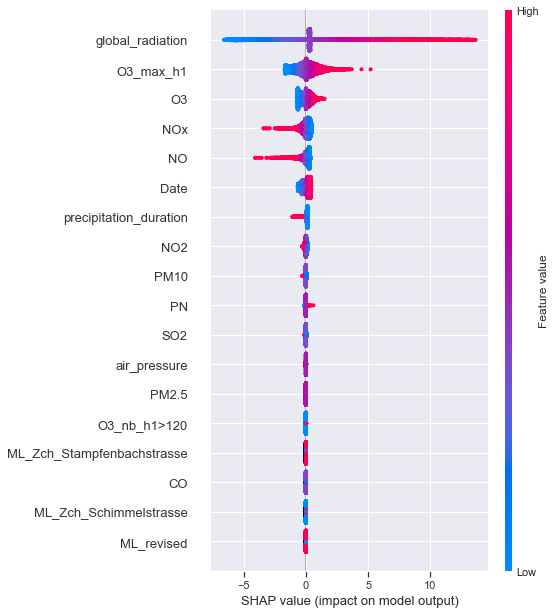

In [43]:
# SHAP summary plot
shap.summary_plot(shap_values_lr, X_train)

### Decision Tree

In [44]:
# Import libraries & packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [45]:
# Fit the model
dt = DecisionTreeRegressor(random_state=42)
dt = dt.fit(X_train,Y_train)

In [46]:
# Make predictions
Y_pred_dt = dt.predict(X_test)

#### SHAP

In [47]:
# Calculate shapley values
explainer_dt = shap.TreeExplainer(dt)
shap_values_dt = explainer_dt.shap_values(X_train)

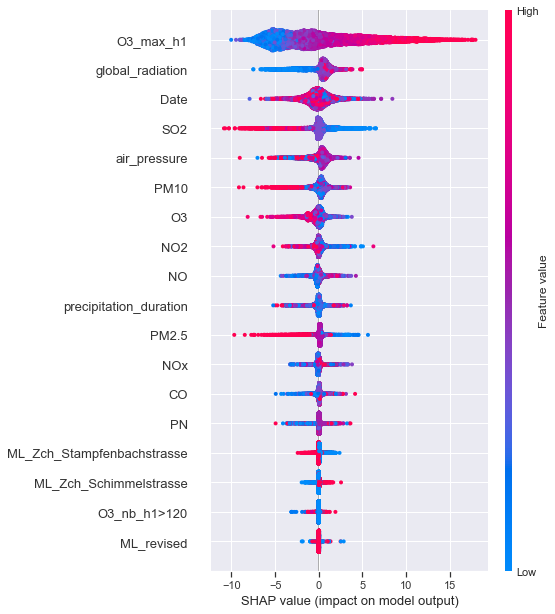

In [48]:
# SHAP summary plot
shap.summary_plot(shap_values_dt, X_train)

### Random Forest

In [49]:
# Import libraries & packages
from sklearn.ensemble import RandomForestRegressor

In [50]:
# Fit the model
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf = rf.fit(X_train, Y_train)

In [51]:
# Make predictions
Y_pred_rf = rf.predict(X_test)

#### SHAP

In [52]:
# Calculate shapley values
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_train)

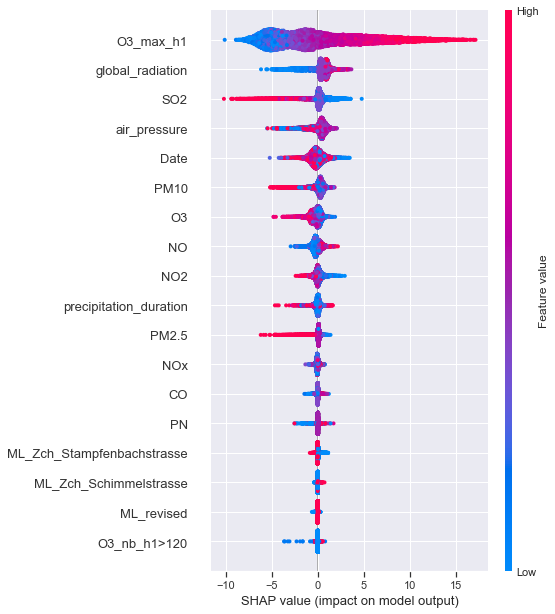

In [53]:
# SHAP summary plot
shap.summary_plot(shap_values_rf, X_train)

### LightGBM

In [54]:
# Import libraries & packages
import lightgbm as lgb

In [55]:
# Fit the model
lgb = lgb.LGBMRegressor()
lgb = lgb.fit(X_train, Y_train)

In [56]:
# Make predictions
Y_pred_lgb = lgb.predict(X_test)

#### SHAP

In [57]:
# Calculate shapley values
explainer_lgb = shap.TreeExplainer(lgb)
shap_values_lgb = explainer_lgb.shap_values(X_train)

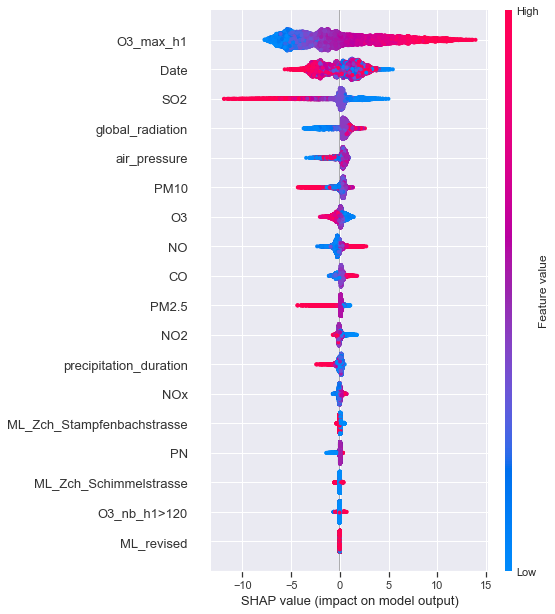

In [58]:
# SHAP summary plot
shap.summary_plot(shap_values_lgb, X_train)

### Performance Metrics

In [59]:
# Import libraries & packages
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

#### R Square and Adjusted R Square

In [60]:
# 1. Linear Regression
R2_lr = r2_score(Y_test, Y_pred_lr)
print('Linear Regression R Square: ', float(format(R2_lr, '.3f')))

Adj_R2_lr = 1 - (1-R2_lr) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Linear Regression Adjusted R Square: ', float(format(Adj_R2_lr, '.3f')))

# 2. Decision Tree
R2_dt = r2_score(Y_test, Y_pred_dt)
print('\nDecision Tree R Square: ', float(format(R2_dt, '.3f')))

Adj_R2_dt = 1 - (1-R2_dt) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Decision Tree Adjusted R Square: ', float(format(Adj_R2_dt, '.3f')))

# 3. Random Forest
R2_rf = r2_score(Y_test, Y_pred_rf)
print('\nRandom Forest R Square: ', float(format(R2_rf, '.3f')))

Adj_R2_rf = 1 - (1-R2_rf) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Random Forest Adjusted R Square: ', float(format(Adj_R2_rf, '.3f')))

# 4. LightGBM
R2_lgb = r2_score(Y_test, Y_pred_lgb)
print('\nLightGBM R Square: ', float(format(R2_lgb, '.3f')))

Adj_R2_lgb = 1 - (1-R2_lgb) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print('LightGBM Adjusted R Square: ', float(format(Adj_R2_lgb, '.3f')))


Linear Regression R Square:  0.404
Linear Regression Adjusted R Square:  0.403

Decision Tree R Square:  0.558
Decision Tree Adjusted R Square:  0.557

Random Forest R Square:  0.737
Random Forest Adjusted R Square:  0.736

LightGBM R Square:  0.828
LightGBM Adjusted R Square:  0.828


#### Mean Square Error (MSE) and Root Mean Square Error (RMSE)

In [61]:
# 1. Linear Regression
mse_lr = MSE(Y_test, Y_pred_lr)
print("Linear Regression MSE: ", float(format(mse_lr, '.3f')))

rmse_lr = mse_lr**(1/2)
print("Linear Regression RMSE: ", float(format(rmse_lr, '.3f')))

# 2. Decision Tree
mse_dt = MSE(Y_test, Y_pred_dt)
print("\nDecision Tree MSE: ", float(format(mse_dt, '.3f')))

rmse_dt = mse_dt**(1/2)
print("Decision Tree RMSE: ", float(format(rmse_dt, '.3f')))

# 3. Random Forest
mse_rf = MSE(Y_test, Y_pred_rf)
print("\nRandom Forest MSE: ", float(format(mse_rf, '.3f')))

rmse_rf = mse_rf**(1/2)
print("Random Forest RMSE: ", float(format(rmse_rf, '.3f')))

# 4. LightGBM
mse_lgb = MSE(Y_test, Y_pred_lgb)
print("\nLightGBM MSE: ", float(format(mse_lgb, '.3f')))

rmse_lgb = mse_lgb**(1/2)
print("LightGBM RMSE: ", float(format(rmse_lgb, '.3f')))

Linear Regression MSE:  34.321
Linear Regression RMSE:  5.858

Decision Tree MSE:  25.447
Decision Tree RMSE:  5.044

Random Forest MSE:  15.157
Random Forest RMSE:  3.893

LightGBM MSE:  9.875
LightGBM RMSE:  3.142


#### Mean Absolute Error (MAE)

In [62]:
# 1. Linear Regression
mae_lr = MAE(Y_test, Y_pred_lr)
print("Linear Regression MAE: ", float(format(mae_lr, '.3f')))

# 2. Decision Tree
mae_dt = MAE(Y_test, Y_pred_dt)
print("\nDecision Tree MAE: ", float(format(mae_dt, '.3f')))

# 3. Random Forest
mae_rf = MAE(Y_test, Y_pred_rf)
print("\nRandom Forest MAE: ", float(format(mae_rf, '.3f')))

# 4. LightGBM
mae_lgb = MAE(Y_test, Y_pred_lgb)
print("\nLightGBM MAE: ", float(format(mae_lgb, '.3f')))

Linear Regression MAE:  4.727

Decision Tree MAE:  3.686

Random Forest MAE:  2.988

LightGBM MAE:  2.463


### LightGBM with selected features only

In [63]:
# Create a new dataframe df_sf (copy of df_ml)
df_sf = df_ml.copy()

df_sf = df_sf.drop(columns=['NOx','ML_revised','ML_Zch_Schimmelstrasse','ML_Zch_Stampfenbachstrasse','PN','O3_nb_h1>120','NO2',
                            'precipitation_duration'])
df_sf

,Date,CO,NO,O3,O3_max_h1,PM10,PM2.5,SO2,air_pressure,global_radiation,temperature
0,709945200000000000,0.920000,27.20,60.550000,95.790000,20.820608,11.025996,6.350000,963.06,135.060000,18.99
1,710031600000000000,1.330000,51.72,48.290000,94.660000,20.820608,11.025996,7.700000,965.23,149.370000,18.36
2,710118000000000000,1.490000,55.47,40.097096,68.553856,20.820608,11.025996,9.180000,965.09,247.370000,21.47
3,710204400000000000,0.660000,16.31,57.590000,92.400000,20.820608,11.025996,4.070000,960.75,73.660000,17.53
4,710290800000000000,0.540000,19.79,39.640000,59.950000,20.820608,11.025996,3.430000,957.95,111.200000,15.56
...,...,...,...,...,...,...,...,...,...,...,...
20196,1647212400000000000,0.547768,15.43,64.040000,86.220000,11.660000,6.070000,5.335884,977.64,125.491918,10.80
20197,1647212400000000000,0.230000,4.27,72.280000,86.380000,9.300000,5.850000,1.090000,975.04,196.380000,10.60
20198,1647298800000000000,0.547768,34.47,16.550000,51.140000,19.260000,11.980000,5.335884,974.51,125.491918,8.38
20199,1647298800000000000,0.547768,21.24,17.860000,51.250000,19.430000,9.860000,5.335884,976.87,125.491918,8.64


In [64]:
# Create train and test split
X_sf = df_sf.drop('temperature',axis=1) # independet variable
Y_sf = df_sf['temperature'] # dependent variable

X_train_sf, X_test_sf, Y_train_sf, Y_test_sf = train_test_split(X_sf,Y_sf,test_size=0.2,random_state=42)

In [65]:
# Import libraries & packages
import lightgbm as lgb

In [66]:
# Fit the model
lgb_sf = lgb.LGBMRegressor()
lgb_sf = lgb_sf.fit(X_train_sf, Y_train_sf)

In [67]:
# Make predictions
Y_pred_lgb_sf = lgb_sf.predict(X_test_sf)

#### SHAP

In [68]:
# Calculate shapley values
explainer_lgb_sf = shap.TreeExplainer(lgb_sf)
shap_values_lgb_sf = explainer_lgb_sf.shap_values(X_train_sf)

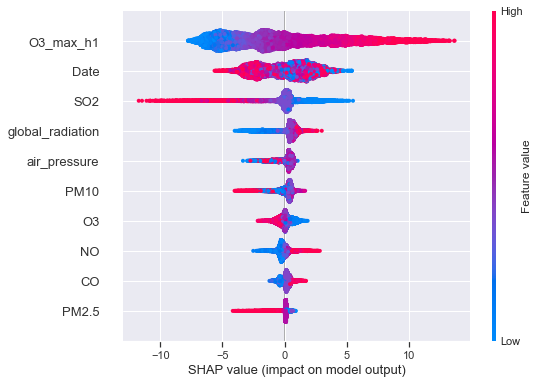

In [69]:
# SHAP summary plot
shap.summary_plot(shap_values_lgb_sf, X_train_sf)

#### Performance Metrics

In [70]:
# R Square and Adjusted R Square
R2_lgb_sf = r2_score(Y_test_sf, Y_pred_lgb_sf)
print('\nLightGBM with selected features R Square: ', float(format(R2_lgb_sf, '.3f')))

Adj_R2_lgb_sf = 1 - (1-R2_lgb_sf) * (len(Y_sf)-1)/(len(Y_sf)-X_sf.shape[1]-1)
print('LightGBM with selected features Adjusted R Square: ', float(format(Adj_R2_lgb_sf, '.3f')))


LightGBM with selected features R Square:  0.833
LightGBM with selected features Adjusted R Square:  0.833


In [71]:
# MSE and RMSE
mse_lgb_sf = MSE(Y_test_sf, Y_pred_lgb_sf)
print("\nLightGBM with selected features MSE: ", float(format(mse_lgb_sf, '.3f')))

rmse_lgb_sf = mse_lgb_sf**(1/2)
print("LightGBM with selected features RMSE: ", float(format(rmse_lgb_sf, '.3f')))


LightGBM with selected features MSE:  9.585
LightGBM with selected features RMSE:  3.096


In [72]:
# MAE
mae_lgb_sf = MAE(Y_test_sf, Y_pred_lgb_sf)
print("\nLightGBM with selected features MAE: ", float(format(mae_lgb_sf, '.3f')))


LightGBM with selected features MAE:  2.437
